In [102]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Change in mean ($\theta_{1} $ known)
Here, except for the change in time $ t_{0} $ all other parameters are assumed to be known.

In [103]:
NUM_SAMPLES = 10000
N = 10
MU_0 = 0
MU_1 = 1
SIGMA = 1


def generate_time_series(MU_0, MU_1, SIGMA, N, NUM_SAMPLES):
    TS = np.concatenate(( np.random.normal(MU_0,SIGMA,(1, NUM_SAMPLES * N)), 
                     np.random.normal(MU_1,SIGMA,(1, NUM_SAMPLES * N))),axis=1 )
    return TS[0]

def get_alarm_time(MU_0, MU_1, SIGMA, TS, N, NUM_SAMPLES, h, kappa):
    v = MU_1 - MU_0
    b = (MU_1 - MU_0)/SIGMA
    
    decision_function = np.sum((TS.reshape(2*NUM_SAMPLES, N) - MU_0 - (v/2)), axis=1)
    
    decisions = decision_function > h
    
    t0 = np.argmax(decisions == True)
    
    threshold = MU_0 + (kappa * SIGMA/np.sqrt(N))
    y_bar = (1/N)*np.sum(TS.reshape(2*NUM_SAMPLES, N), axis=1)
    alarm_time = np.argmax(y_bar >= threshold)
    
    return decision_function, t0, alarm_time


def grid_search(kappa_values, h_values):
    for k in kappa_values:
        for h in h_values:
            print(h, k)
    return None

### Alarm is set when $ \frac{1}{N} \sum_{i=N(K-1)+1}^{NK} y_{i} \ge \mu_{0} + \kappa \frac{\sigma}{\sqrt{N}} $ 

In [113]:
n = 3
num_samples = 100

TS = generate_time_series(0, 1, 1, n, num_samples)
print(TS.shape)
decision_fn, time, alarm_time = get_alarm_time(0, 1, 1, TS, n, num_samples, 3.6, 5)
print(decision_fn.shape, time, alarm_time)

(600,)
(200,) 109 0


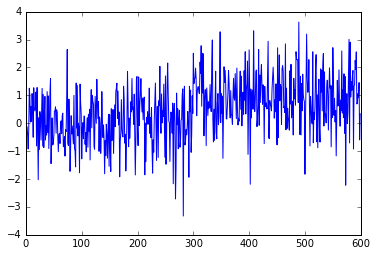

In [105]:
plt.plot(TS)

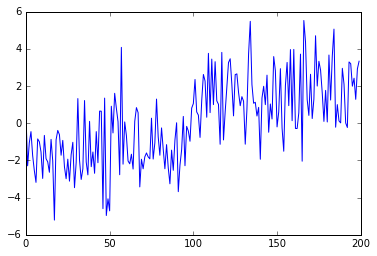

In [78]:
plt.plot(decision_fn)

In [79]:
print(np.argmax(decision_fn > 3.6))
indices = [9,24,123]
decision_fn[indices]

decision_fn[100:124]

57


array([ 1.05556939,  2.35106791,  0.60702925,  0.43483081, -0.76398651,
        1.21677644,  2.61987668,  2.2673547 ,  0.31990349,  3.75610423,
        0.5684939 ,  3.44720565,  0.99865746,  3.30668029,  1.20237769,
        1.01719843, -1.13283649,  3.80708167, -0.90083247,  0.59218411,
        1.9610987 ,  3.26139701,  3.46413031,  2.0801384 ])

In [80]:
decision_fn > 3.6

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,

In [81]:
decision_fn[:100].max()

4.0770224543691729

In [82]:
decision_fn[100:199].max()

5.5213511210644679